# WEB SCRAPING & DATA ANALYSIS

In [17]:
#step1:SCRAPING DATA FROM SKYTRAX


#!pip install textblob
#!pip install wordcloud
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 960.0 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 901.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 952.6 kB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.2 MB/s eta 0:00:00


In [7]:
# Ensure the "data" directory exists
output_dir = "data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to the "data" directory
df = pd.DataFrame(reviews, columns=["Review"])
output_path = os.path.join(output_dir, "BA_reviews.csv")
df.to_csv(output_path, index=False)

print(f"Data saved to '{output_path}'")
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10  # Number of pages to scrape
page_size = 100  # Reviews per page

reviews = []  # List to store reviews

# Loop through pages to scrape reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL for paginated pages
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Request page content
    response = requests.get(url)
    
    # Parse the HTML content
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    
    # Find and extract reviews
    for para in soup.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text().strip())
    
    print(f"   ---> {len(reviews)} total reviews collected so far")

# Save reviews into a DataFrame
df = pd.DataFrame(reviews, columns=["Review"])

# Export data to CSV
df.to_csv("data/BA_reviews.csv", index=False)
print("Data saved to 'data/BA_reviews.csv'")


Data saved to 'data\BA_reviews.csv'
Scraping page 1
   ---> 100 total reviews collected so far
Scraping page 2
   ---> 200 total reviews collected so far
Scraping page 3
   ---> 300 total reviews collected so far
Scraping page 4
   ---> 400 total reviews collected so far
Scraping page 5
   ---> 500 total reviews collected so far
Scraping page 6
   ---> 600 total reviews collected so far
Scraping page 7
   ---> 700 total reviews collected so far
Scraping page 8
   ---> 800 total reviews collected so far
Scraping page 9
   ---> 900 total reviews collected so far
Scraping page 10
   ---> 1000 total reviews collected so far
Data saved to 'data/BA_reviews.csv'


In [8]:
#Step 2: Analyze the Data
#1:Load the Scraped Data:
df = pd.read_csv("data/BA_reviews.csv")
print(df.head())
#2:Clean the Data:
import re

# Clean text data
df['Cleaned_Review'] = df['Review'].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x.lower()))
print(df.head())



                                              Review
0  Not Verified |  British Airways stranding my w...
1  ✅ Trip Verified |   Although like many these d...
2  ✅ Trip Verified | This flight was British Airw...
3  Not Verified | The worst airline I have ever f...
4  ✅ Trip Verified |   Disappointing service, pla...
                                              Review  \
0  Not Verified |  British Airways stranding my w...   
1  ✅ Trip Verified |   Although like many these d...   
2  ✅ Trip Verified | This flight was British Airw...   
3  Not Verified | The worst airline I have ever f...   
4  ✅ Trip Verified |   Disappointing service, pla...   

                                      Cleaned_Review  
0  not verified   british airways stranding my wi...  
1   trip verified    although like many these day...  
2   trip verified  this flight was british airway...  
3  not verified  the worst airline i have ever fl...  
4   trip verified    disappointing service plane ...  


In [14]:
#step 3:Perform Sentiment Analysis:

#Use the TextBlob library to classify sentiment.

from textblob import TextBlob

# Add sentiment polarity scores
df['Sentiment'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
print(df.head())



                                              Review  \
0  Not Verified |  British Airways stranding my w...   
1  ✅ Trip Verified |   Although like many these d...   
2  ✅ Trip Verified | This flight was British Airw...   
3  Not Verified | The worst airline I have ever f...   
4  ✅ Trip Verified |   Disappointing service, pla...   

                                      Cleaned_Review  Sentiment  \
0  not verified   british airways stranding my wi...  -0.165000   
1   trip verified    although like many these day...   0.008929   
2   trip verified  this flight was british airway...   0.501929   
3  not verified  the worst airline i have ever fl...  -0.069421   
4   trip verified    disappointing service plane ...  -0.092749   

  Sentiment_Label  
0        Negative  
1        Positive  
2        Positive  
3        Negative  
4        Negative  


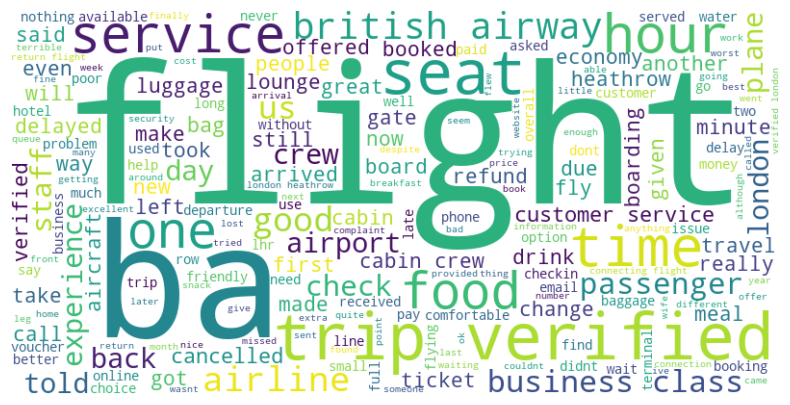

In [18]:
#Step 4:Create Visualizations:
#Generate a word cloud:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one string
text = " ".join(review for review in df['Cleaned_Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


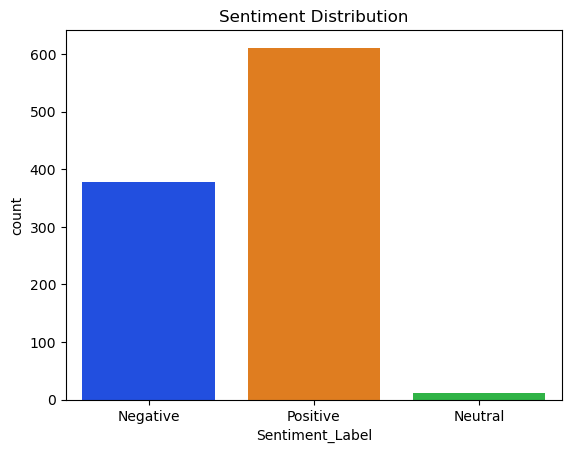

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment counts
sns.countplot(data=df, x='Sentiment_Label', palette='bright')
plt.title("Sentiment Distribution")
plt.show()
